Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [80]:
%matplotlib inline

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

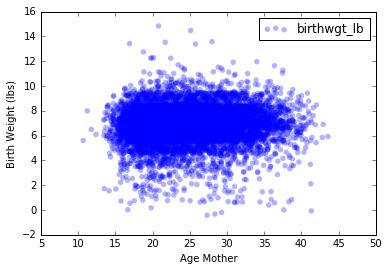

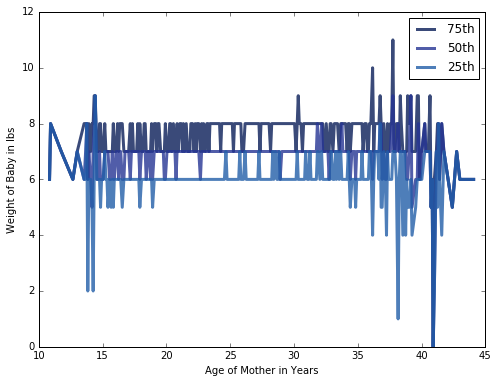

Pearson Corr Age v Weight 0.0689622017115
Spearman Corr Age v Weight 0.0945629753464


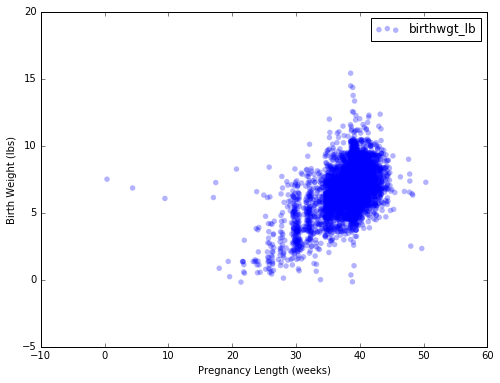

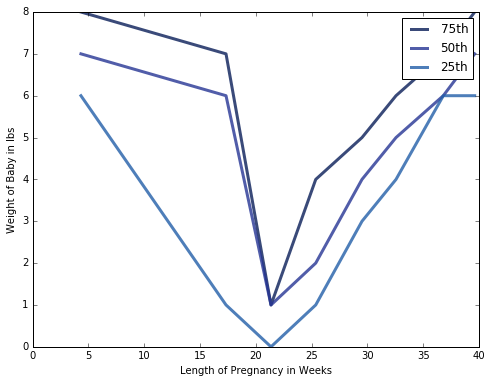

Pearson Corr Length v Weight 0.485165328421
Spearman Corr Length v Weight 0.352799982421


In [81]:
import nsfg
import thinkstats2
import thinkplot 
import numpy as np

df = nsfg.ReadFemPreg()

#introduce jitter to produce more "honest" data representation
age = df.agepreg[df.birthwgt_lb <= 95]
age = thinkstats2.Jitter(age,0.5)
weight = df.birthwgt_lb[df.birthwgt_lb <= 95]
weight = thinkstats2.Jitter(weight,0.5)

#make a scatter plot
thinkplot.Scatter(age,weight,alpha=0.3)
thinkplot.Show(xlabel='Age Mother', ylabel='Birth Weight (lbs)')

#plot percentiles of birthweight versus mother's age
df_sub = df.dropna(subset=['agepreg','birthwgt_lb']) #only apply aggressive dropna to data we care about
age = df_sub.agepreg[df_sub.birthwgt_lb <= 95]
bins = np.arange(5,50,0.1) #bins of a little over a month in time
indices = np.digitize(age,bins)
groups = df_sub.groupby(indices)

ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.birthwgt_lb) for i, group in groups]

for percent in [75,50,25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages,weights,label=label)

thinkplot.Show(xlabel='Age of Mother in Years', ylabel='Weight of Baby in lbs')

#Pearson's and Spearman's correlations
pear_corr = thinkstats2.Corr(df_sub.agepreg,df_sub.birthwgt_lb)
print 'Pearson Corr Age v Weight', pear_corr #pretty close to zero, implying little to no correlation
spear_corr = thinkstats2.SpearmanCorr(df_sub.agepreg, df_sub.birthwgt_lb)
print 'Spearman Corr Age v Weight', spear_corr

#I would claim that there is no correlation amongst 
#these variables. I posited that length of the pregnancy would 
#probably be more strongly correlated, which is the case. That info is here:

weeks = df.prglngth[df.birthwgt_lb <= 95]
weeks = thinkstats2.Jitter(weeks,0.5)
weight = df.birthwgt_lb[df.birthwgt_lb <= 95]
weight = thinkstats2.Jitter(weight,0.5)

thinkplot.Scatter(weeks,weight,alpha=0.3)
thinkplot.Show(xlabel='Pregnancy Length (weeks)', ylabel='Birth Weight (lbs)')

df_sub = df.dropna(subset=['prglngth','birthwgt_lb'])
sub_prglngth = df_sub.prglngth[(df_sub.birthwgt_lb <= 95)]
bins = np.arange(15,40,4) #bins of about a month
indices = np.digitize(sub_prglngth,bins)
groups = df_sub.groupby(indices)

weeks = [group.prglngth.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.birthwgt_lb) for i, group in groups]

for percent in [75,50,25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(weeks,weights,label=label)


thinkplot.Show(xlabel='Length of Pregnancy in Weeks', ylabel='Weight of Baby in lbs')

pear_corr = thinkstats2.Corr(sub_prglngth, df_sub.birthwgt_lb)
print 'Pearson Corr Length v Weight', pear_corr #a fairly reasonable correlation
spear_corr = thinkstats2.SpearmanCorr(sub_prglngth,df_sub.birthwgt_lb)
print 'Spearman Corr Length v Weight', spear_corr #a little lower, which is interesting
